<a href="https://colab.research.google.com/github/ruan-math/Rede_Neural_MLP/blob/main/Treinamento__Rede_Neural_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Adicionar Bibliotecas


In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)               

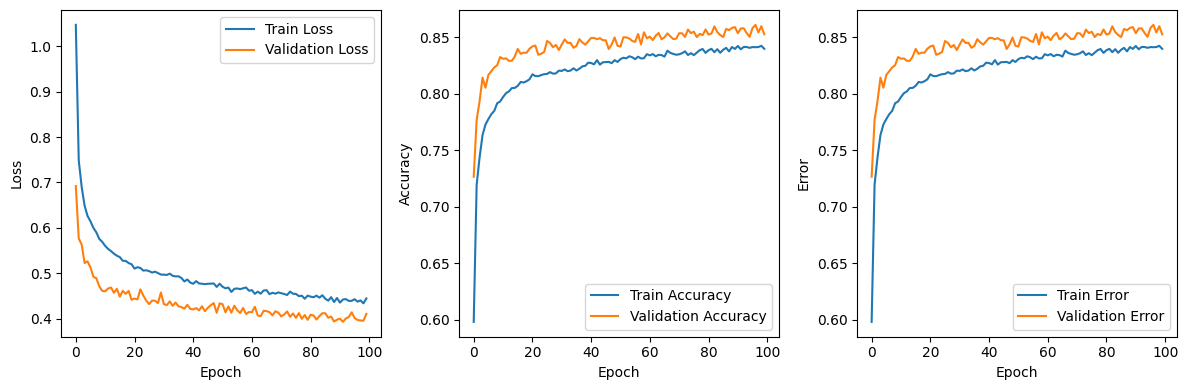

Test loss: 0.4102402329444885
Test accuracy: 85.26 %
Test error: 14.74 %


In [4]:
# Implementação da Rede Neural MLP
import os
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import sys

# Carregamento dos dados
(AX, AY), (QX, QY) = fashion_mnist.load_data()
AX = 255 - AX
QX = 255 - QX

nclasses = 10
AY2 = to_categorical(AY, nclasses)
QY2 = to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2]  # 28, 28
AX = AX.astype('float32') / 255.0  # 0 a 1
QX = QX.astype('float32') / 255.0  # 0 a 1

# Definição do modelo
model = Sequential()
model.add(Flatten(input_shape=(nl, nc)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

# Resumo do modelo
model.summary()

# Compilação do modelo
opt = optimizers.Adam()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo com registro de métricas
history = model.fit(AX, AY2,
                    batch_size=100,
                    epochs=100,
                    verbose=True,
                    validation_data=(QX, QY2))

# Plotagem dos gráficos
plt.figure(figsize=(12, 4))

# Gráfico da perda
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico do erro
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Error')
plt.plot(history.history['val_accuracy'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

# Avaliação final do modelo
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy: %.2f %%' % (100 * score[1]))
print('Test error: %.2f %%' % (100 * (1 - score[1])))

# Salvando o modelo treinado
model.save('MLP4.h5')


##Agora Testamos Com o Modelo de Predição

Test loss: 0.4102
Test accuracy: 85.26 %
Test error: 14.74 %
1/1 [==============================] - 0s 72ms/step


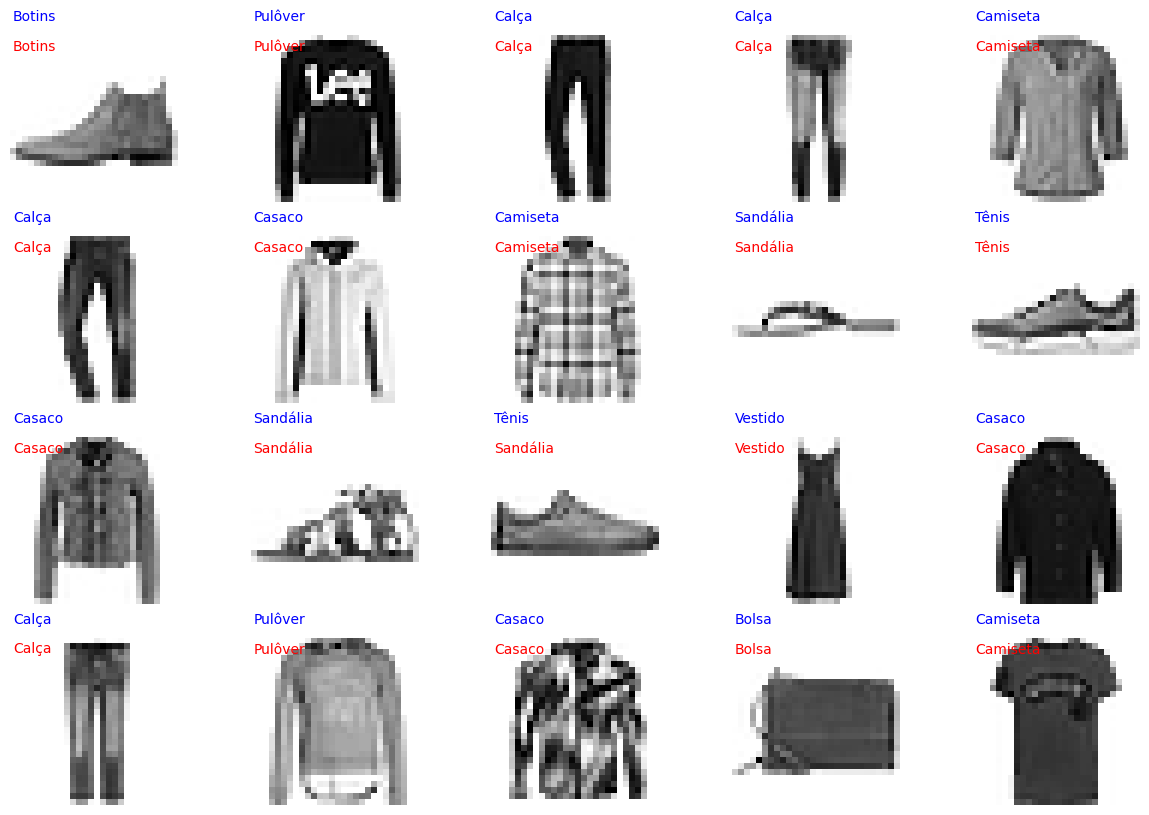

In [5]:
# PREDIÇÃO
import os
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
from keras.models import load_model
from keras.utils import to_categorical
import numpy as np; import sys; import os; from time import time

(_,_), (QX, QY) = fashion_mnist.load_data()
QX=255-QX
nclasses = 10
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = QX.shape[1], QX.shape[2] #28, 28
QX = QX.astype('float32') / 255.0 # 0 a 1
model=load_model('MLP4.h5')
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália",
 "Camiseta", "Tênis", "Bolsa", "Botins"]

QP_test= model.predict(QX[:20,:,:])
QP_predict = np.argmax(QP_test, axis=-1)

f= plt.figure(figsize=(15, 10))
for i in range(20):
 f.add_subplot(4,5,i+1)
 plt.imshow( QX[i,:,:], cmap="gray")
 plt.axis("off");
 plt.text(0,-3,categorias[QY[i]],color="b")
 plt.text(0, 2,categorias[QP_predict[i]],color="r")
plt.savefig("img.png")
plt.show()
